# Generate pseudo data

This code just generates some time series.

The shape of the data and number of clusters is probably wrong, but the sizes are roughly about right.
I've used the number of time points from the actual time series.

In [39]:
import sys
sys.path.append('~/GPy/GPy') #change to where your GPy is installed or remove if in path
import GPy
import numpy as np
import matplotlib.pyplot as plt
import time
import random
%matplotlib inline

#make some simulated data

S = 9  #number of time series per data point

#actual numbers of time points (0,1,2,3...)
#Note I've already removed patients with less than 3 time points.
Tpointcounts = np.array([   0.,    0.,    0.,  113.,   78.,   72.,   48.,   42.,   36., 32.,   23.,   11.,    5.,    5.,    6.,    4.,    9.,    3.,   3.,    4.,    2.,    1.,    2.,    1.,    3.,    1.,    2.,   1.,    1.,    2.,    0.,    0.,    1.,    0.,    1.,    0.,   1.,    0.,    0.])  
Tpoints = []
for i,count in enumerate(Tpointcounts):
    for j in range(int(count)):
        Tpoints.append(i)

N = len(Tpoints) #we now get N from the number of points
print("%d patients in current data set" % N)
C = 9  #number of clusters

#actual latent function
def lat_fn(t,s,c): #time, series, cluster
    return np.sin(1.0*(1.0+t)*(1.0+c)/(10.0+c)+c)**(c+1.0)+t*(0.01*c*s)+c*0.2+1-s*0.2

data = []
inputs = []
dataA = []
inputsA = []
groundtruth = []

offsets = np.random.randn(N)*0 #no time offsets

for p in range(N):
    #sample from the known distribution of number of time points.
    T = random.sample(Tpoints,1)[0]    
    Tpoints.remove(T)

    persondata = np.zeros([S,T])
    personinputs = np.zeros([T,1])
    indx = 0
    c = np.random.randint(0,C) #pick cluster we're going to put person in
    groundtruth.append(c)
    pt = 0
    for t in range(T):
        personinputs[indx,0] = pt
        indx+=1
        for s in range(S):
            persondata[s,t] = lat_fn(pt+offsets[p],s,c) + np.random.randn(1)*0.5
        pt += np.random.randint(1,10)
    data.append(persondata)
    inputs.append(personinputs)

513 patients in current data set


(array([ 311.,  110.,   39.,   24.,   10.,    5.,    7.,    4.,    1.,    2.]),
 array([  3. ,   6.3,   9.6,  12.9,  16.2,  19.5,  22.8,  26.1,  29.4,
         32.7,  36. ]),
 <a list of 10 Patch objects>)

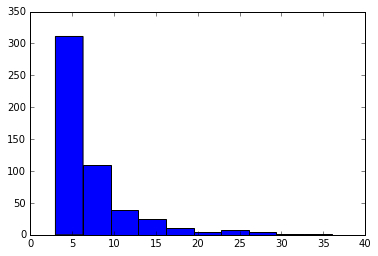

In [41]:
# Demonstrates number of time points matches original data.
plt.hist([data[i].shape[1] for i in range(len(data))])

# Actually run the algorithm

In [ ]:
starttime = time.time()
active = GPy.util.cluster_with_offset.cluster(data,inputs,verbose=True)
endtime = time.time()
print("TOTAL TIME %0.4f" % (endtime-starttime))